In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

In [82]:
x, y, b1, b2, b3 = np.loadtxt('/Users/yao/Documents/Data/AMRVAC/test1/visit_b1_b2_b3_0010.xyz',
                        unpack=True,skiprows=2,usecols=[1,2,4,5,6])


In [84]:
xu = np.unique(x)

In [85]:
xu

array([-24.       , -23.7000008, -23.3999996, ...,  47.4000015,
        47.7000008,  48.       ], shape=(1001,))

In [12]:
def grid_data(x, y, data, Nx, Ny):
    xi = np.searchsorted(np.unique(x), x)
    yj = np.searchsorted(np.unique(y), y)
    flat_idx = xi * Ny + yj
    order = np.argsort(flat_idx)
    flat_idx = flat_idx[order]
    uniq_flat, start_idx, counts = np.unique(flat_idx, return_index=True, return_counts=True)
    data_sorted = data[order]
    data_sum = np.add.reduceat(data_sorted, start_idx)
    data_mean = data_sum / counts
    data_grid = np.full((Nx, Ny), np.nan)
    ii = uniq_flat // Ny
    jj = uniq_flat % Ny
    data_grid[ii, jj] = data_mean
    return data_grid

In [13]:
xu = np.unique(x)
yu = np.unique(y)
Nx, Ny = xu.size, yu.size

b1_grid = grid_data(x, y, b1, Nx, Ny)
b2_grid = grid_data(x, y, b2, Nx, Ny)
b3_grid = grid_data(x, y, b3, Nx, Ny)

In [56]:
x_grid = grid_data(x, y, x, Nx, Ny)
y_grid = grid_data(x, y, y, Nx, Ny)

In [57]:
x_grid.shape

(1001, 321)

In [14]:
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

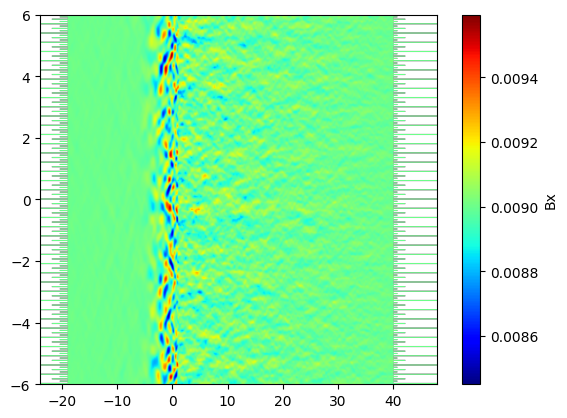

In [17]:
plt.imshow(b1_grid.T, 
           origin='lower', 
           extent=(xmin, xmax, ymin, ymax), 
           cmap='jet',
           aspect='auto')
plt.colorbar(label='Bx')

In [19]:
# Converting simulation units to physical units
mpCGS=1.67e-24                          # g
vA=1e-4*3.0e10                          # cm/s
ni=0.002                                 # cm^-3
B0=vA*np.sqrt(4.0*np.pi*ni*mpCGS)*1.0e6 # uG
print('Field strength of the ordered field = %.2e uG' % B0)

Field strength of the ordered field = 6.15e-01 uG


In [21]:
fs = 12

# Plot components of B-field 
def plot_compB(x, y, B1, B2, B3, i_comp):

    # Extent of simulation domains in unit of rg of simulated particles
    xmin=np.min(x)
    xmax=np.max(x)
    ymin=np.min(y)
    ymax=np.max(y)


    # Plot components of B-field
    fig, ax=plt.subplots(figsize=(10,4.5))
    if(i_comp==1):
        im=ax.imshow(B1[:,:].T, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='magma')#, vmin=-200, vmax=200)
        ax.set_title(r'$B_1(x,y)$', fontsize=fs)
    if(i_comp==2):
        im=ax.imshow(B2[:,:].T, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='magma')#, vmin=-200, vmax=200)
        ax.set_title(r'$B_2(x,y)$', fontsize=fs)
    if(i_comp==3):
        im=ax.imshow(B3[:,:].T, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='magma')#, vmin=-200, vmax=200)
        ax.set_title(r'$B_3(x,y)$', fontsize=fs)

    ax.set_xlabel(r'$x/r_{\rm CR}$', fontsize=fs)
    ax.set_ylabel(r'$y/r_{\rm CR}$', fontsize=fs)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    # ax.set_xlim(-40,40)
    # ax.set_ylim(-20,20)
    # ax.set_title(r'$\Omega_0 t=%d$, %s' % (step*10, sim_name), fontsize=fs+2, x=0.01, y=0.98, ha='left')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax).ax.tick_params(labelsize=fs)    
    # plt.savefig('Results_%s/fg_compB%d_%s_%d.png' % (sim_name, i_comp, sim_name, step))
    # plt.close()

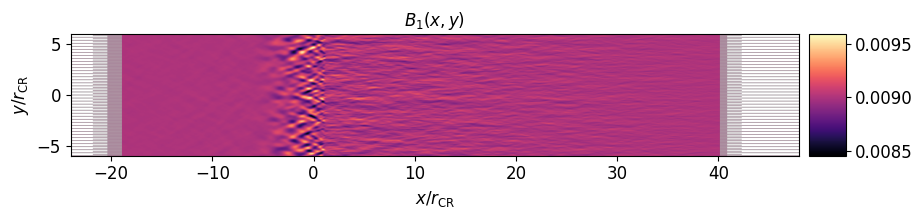

In [29]:
plot_compB(x, y, b1_grid, b2_grid, b3_grid, 1)


In [50]:
def print_nan(a):
    # Boolean mask of NaN positions
    mask = np.isnan(a)
    print(mask)
    # [False  True False False]

    # Check if there is at least one NaN
    print(np.any(mask))
    # True

    # Count how many NaNs
    print('There is ', np.sum(mask), 'of NaNs out of an array of size:', a.size)
    # 1

    # Get indices of NaNs
    print(np.where(mask))
    # (array([1]),)
    return 0

In [42]:
kx=(np.fft.fftshift(np.fft.fftfreq(Nx,(xmax-xmin)/Nx)))*2.0*np.pi
ky=(np.fft.fftshift(np.fft.fftfreq(Ny,(ymax-ymin)/Ny)))*2.0*np.pi
kxmin=np.min(kx)
kxmax=np.max(kx)
kymin=np.min(ky)
kymax=np.max(ky)

print(kxmin, kxmax, kymin, kymax)

-43.63323129985823 43.63323129985823 -83.77580409572784 83.77580409572784


In [114]:
mask = (xu >= -10) & (xu <= 20)
b1_new = b1_grid[mask,:]
b2_new = b2_grid[mask,:]
b3_new = b3_grid[mask,:]
x_new = x_grid[mask,:]
y_new = y_grid[mask,:]

# b1_new = np.where()

# print(mask)
# print(b1_new.shape)
# print(b1_grid.shape)

In [115]:
xmin = np.min(x_new)
xmax = np.max(x_new)
ymin = np.min(y)
ymax = np.max(y)

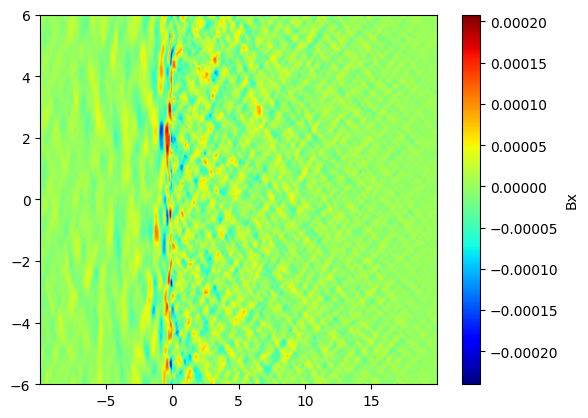

In [118]:
plt.imshow(b3_new.T, 
           origin='lower', 
           extent=(xmin, xmax, ymin, ymax), 
           cmap='jet',
           aspect='auto')
plt.colorbar(label='Bx')

In [87]:
b1_new.shape

(911, 321)

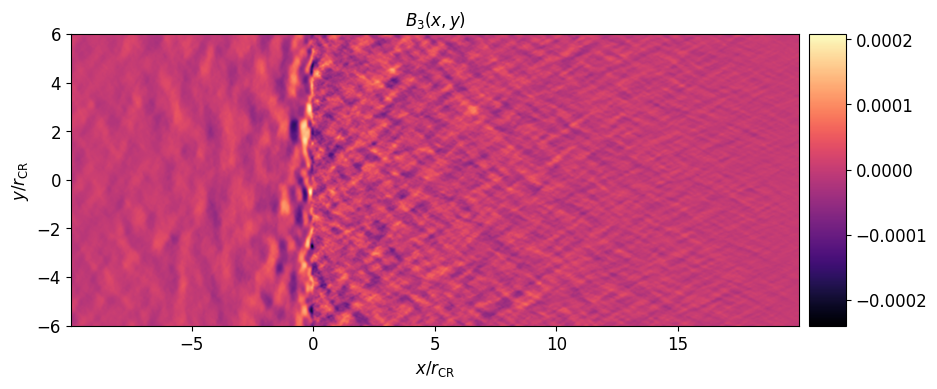

In [121]:
plot_compB(x_new, y_new, b1_new, b2_new, b3_new, 3)


In [122]:
# Apply 2D FFT
b1_fft=np.fft.fft2(b1_new)
b2_fft=np.fft.fft2(b2_new)
b3_fft=np.fft.fft2(b3_new)

print(b3_fft.shape)
print_nan(b3_fft)

(800, 321)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False
There is  0 of NaNs out of an array of size: 256800
(array([], dtype=int64), array([], dtype=int64))


0

In [123]:


# Shift the zero frequency component to the center
b1_fft=np.fft.fftshift(b1_fft)
b2_fft=np.fft.fftshift(b2_fft)
b3_fft=np.fft.fftshift(b3_fft)

# Compute the magnitude 
P_11_mag=np.abs(b1_fft)**2
P_22_mag=np.abs(b2_fft)**2
P_33_mag=np.abs(b3_fft)**2

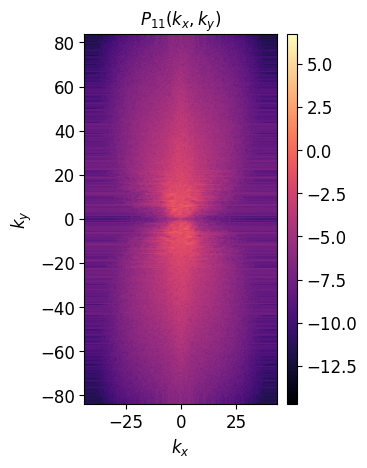

In [124]:
fig, ax = plt.subplots()

im = ax.imshow(np.log10(P_11_mag).T,
               extent=[kxmin, kxmax, kymin, kymax],
               origin='lower',
            #    vmin=0,
            #    vmax=0.01,
               cmap='magma')

ax.set_title(r'$P_{11}(k_x,k_y)$', fontsize=fs)
ax.set_xlabel(r'$k_x$', fontsize=fs)
ax.set_ylabel(r'$k_y$', fontsize=fs)
ax.tick_params(axis='x', labelsize=fs)
ax.tick_params(axis='y', labelsize=fs)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax).ax.tick_params(labelsize=fs)

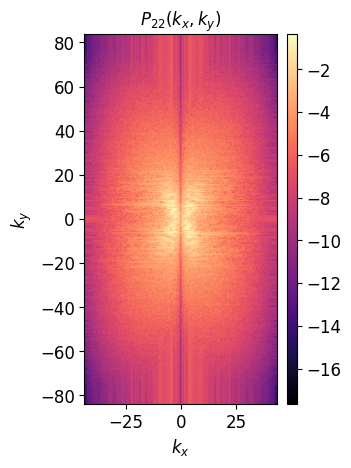

In [125]:
fig, ax = plt.subplots()

im = ax.imshow(np.log10(P_22_mag).T,
               extent=[kxmin, kxmax, kymin, kymax],
               origin='lower',
               cmap='magma')

ax.set_title(r'$P_{22}(k_x,k_y)$', fontsize=fs)
ax.set_xlabel(r'$k_x$', fontsize=fs)
ax.set_ylabel(r'$k_y$', fontsize=fs)
ax.tick_params(axis='x', labelsize=fs)
ax.tick_params(axis='y', labelsize=fs)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax).ax.tick_params(labelsize=fs)

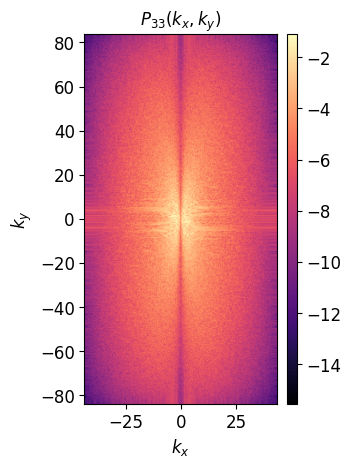

In [126]:
fig, ax = plt.subplots()

im = ax.imshow(np.log10(P_33_mag).T,
               extent=[kxmin, kxmax, kymin, kymax],
               origin='lower',
               cmap='magma')

ax.set_title(r'$P_{33}(k_x,k_y)$', fontsize=fs)
ax.set_xlabel(r'$k_x$', fontsize=fs)
ax.set_ylabel(r'$k_y$', fontsize=fs)
ax.tick_params(axis='x', labelsize=fs)
ax.tick_params(axis='y', labelsize=fs)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax).ax.tick_params(labelsize=fs)

In [ ]:
# try also to do an average over kx / ky to get 1D spectrum.

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(1001, 321))

In [41]:
# Boolean mask of NaN positions
mask = np.isnan(P_33_mag)
print(mask)
# [False  True False False]

# Check if there is at least one NaN
print(np.any(mask))
# True

# Count how many NaNs
print(np.sum(mask))
# 1

# Get indices of NaNs
print(np.where(mask))
# (array([1]),)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
True
321321
(array([   0,    0,    0, ..., 1000, 1000, 1000], shape=(321321,)), array([  0,   1,   2, ..., 318, 319, 320], shape=(321321,)))
